In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [34]:
from helpers import load_data

# load dataset
x, y = load_data()

In [35]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [36]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly
from split_data import split_data
from least_squares import least_squares

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    test_indices = k_indices[k]
    test_y = y[test_indices]
    test_x = x[test_indices]
    train_y, train_x = np.delete(y, test_indices, axis=0), np.delete(x, test_indices, axis=0)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    train_x = build_poly(train_x, degree)
    test_x = build_poly(test_x, degree)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    w,_ = ridge_regression(train_y, train_x, lambda_)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    loss_tr = np.sqrt(2 * compute_mse(train_y, train_x, w))
    loss_te = np.sqrt(2 * compute_mse(test_y, test_x, w))
    # ***************************************************
    return loss_tr, loss_te

[[27 35 40 38  2  3 48 29 46 31 32 39]
 [21 36 19 42 49 26 22 13 41 17 45 24]
 [23  4 33 14 30 10 28 44 34 18 20 25]
 [ 6  7 47  1 16  0 15  5 11  9  8 12]]
(50,)


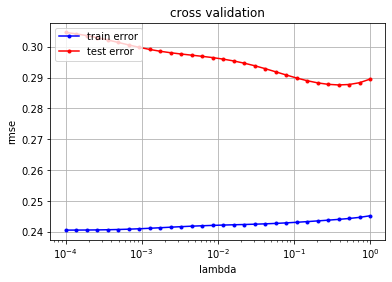

In [37]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    print(k_indices)
    print(y.shape)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    for lambda_ in lambdas:
        rmse_tr_k = []
        rmse_te_k = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_tr_k.append(loss_tr)
            rmse_te_k.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_k))
        rmse_te.append(np.mean(rmse_te_k))                        
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

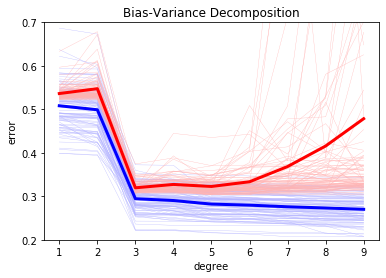

In [49]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        train_y, train_x, test_y, test_x = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            train_x_degree, test_x_degree = build_poly(train_x, degree), build_poly(test_x, degree)
            w, _ = least_squares(train_y, train_x_degree)
            rmse_tr[index_seed, index_degree] = np.sqrt(2 * compute_mse(train_y, train_x_degree, w))
            rmse_te[index_seed, index_degree] = np.sqrt(2 * compute_mse(test_y, test_x_degree, w))
        # ***************************************************
#         raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()